In [89]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

def error(x,y,theta0, theta1):
    error = np.zeros((len(theta0),len(theta1)))
    for i in range(len(theta0)):
        for j in range(len(theta0)):
            error[i][j] = ((y-theta0[i]-x*theta1[j])**2).mean()
    return error


In [90]:
X=np.array([1,3,6])
Y=np.array([6,10,16])

In [91]:
X

array([1, 3, 6])

In [92]:
Y

array([ 6, 10, 16])

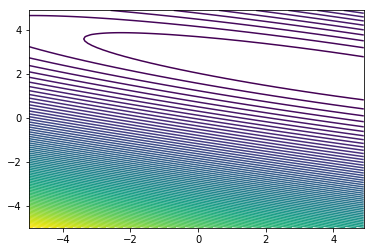

In [93]:
theta0 = np.arange(-5.0, 5.00, 0.1)
theta1 = np.arange(-5.0, 5.00, 0.1)
x, y = np.meshgrid(theta0, theta1)
z=error(X,Y, theta0,theta1)
plt.contour(y,x,z,100)

[]

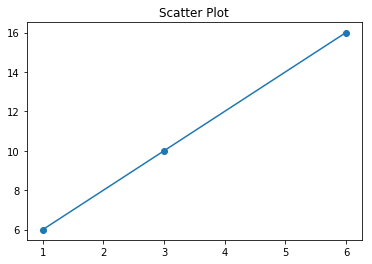

In [94]:
plt.scatter(X,Y)
plt.plot(X,Y)
plt.title("Scatter Plot")
plt.plot()

MovieWriter ffmpeg unavailable.


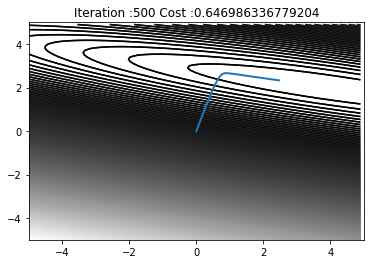

In [105]:
#animation
def init():
    plt.contour(y,x,z ,300, cmap='gray')
    line.set_data([], [])
    return line,


fig = plt.figure()
plt.contour(x,y,z ,300);
axs = plt.axes(xlim=(-5, 5), ylim=(-5, 5))

line, = axs.plot([], [], lw=2)

def animate(i):
    alpha=0.001
    global X_
    global Y
    global theta
    error = Y - np.matmul(X_,theta)
    theta_ = np.copy(theta)
    for i_ in range(len(Y)):
        theta_ = np.copy(theta)
        for j in range(len(theta)):
            theta_[j] = theta_[j] + 2*alpha*(Y[i_] - X_[i_].dot(theta))*X_[i_][j]
        theta = theta_
    val = ((Y-theta[0]-X*theta[1])**2).mean()
    plt.title("Iteration :"+str(i+1)+ " Cost :"+ str(val))
    line.set_data(x_to_plot,y_to_plot)
    x_to_plot.append(theta[0])
    y_to_plot.append(theta[1])
    return line,
X_ = np.c_[np.ones(len(X)),X]
theta = np.zeros((len(X_[0]),1))
x_to_plot = list(theta[0])
y_to_plot = list(theta[1])
line.set_data(x_to_plot,y_to_plot)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=500, interval=40, blit=True)
anim.save('Anim_SGD1.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
plt.show()

link for animation: https://drive.google.com/open?id=1RzHuSR6-zWDpFPaCwe6xDtPRQtA9o4Lw

MovieWriter ffmpeg unavailable.


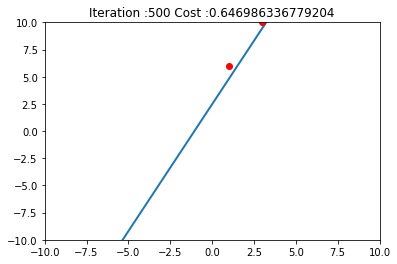

In [106]:
#line_animation
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
line, = ax.plot([], [], lw=2)
line2, = ax.plot(X,Y,'ro')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    
    alpha=0.001
    global X_
    global Y
    global theta
    error = Y - np.matmul(X_,theta)
    theta_ = np.copy(theta)
    for i_ in range(len(Y)):
        theta_ = np.copy(theta)
        for j in range(len(theta)):
            theta_[j] = theta_[j] + 2*alpha*(Y[i_] - X_[i_].dot(theta))*X_[i_][j]
        theta = theta_
    curr_x = np.linspace(-20, 20, 1000)
    curr_y = theta[0]+ curr_x * theta[1]
    val = ((Y-theta[0]-X*theta[1])**2).mean()
    plt.title("Iteration :"+str(i+1)+ " Cost :"+ str(val))
    line2.set_data(X,Y)
    line.set_data(curr_x,curr_y)
    return line,
X_= np.c_[np.ones(len(X)),X]
theta = np.zeros((len(X_[0]),1))
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=True)
anim.save('Anim_SGD2.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()

link for animation: https://drive.google.com/open?id=1NXdF87WTjLUTS4MJv7ZJNY5K0VtRG0gJ